# Condensed Nearest Neighbors Analysis

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import CondensedNearestNeighbour

plt.style.use("dark_background")

%matplotlib inline

---

## Create Data

In [2]:
def make_data(sep):
    
    # Returns arrays
    X, y = make_classification(
        n_samples= 1000,
        n_features = 2,
        n_redundant=0,
        n_clusters_per_class = 1,
        weights= [0.99],
        class_sep= sep,
        random_state = 10
    )
    
    # Transform arrays into pandas dataframe and series
    X = pd.DataFrame(X, columns = ["varA", "varB"])
    y = pd.Series(y)

    return X, y

0    985
1     15
Name: count, dtype: int64


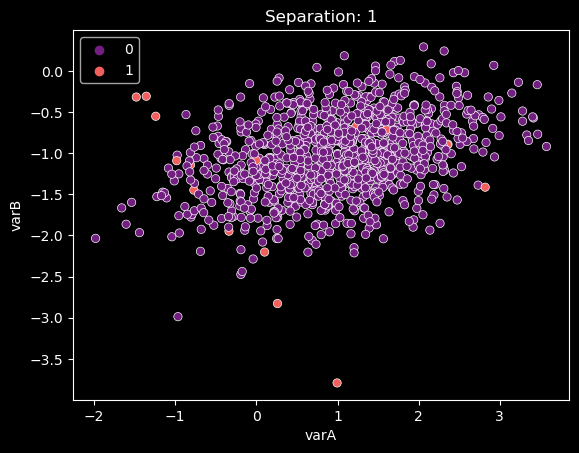

0    985
1     15
Name: count, dtype: int64


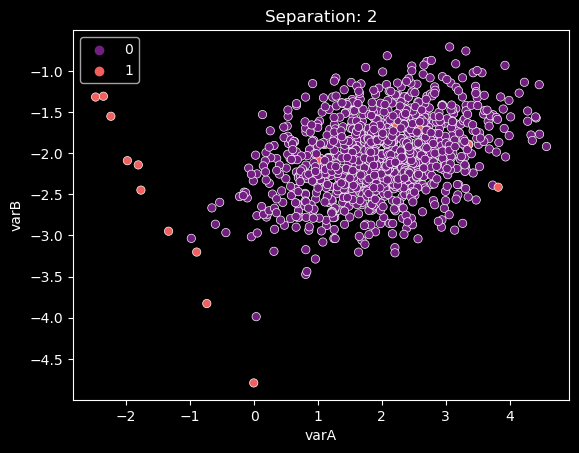

0    985
1     15
Name: count, dtype: int64


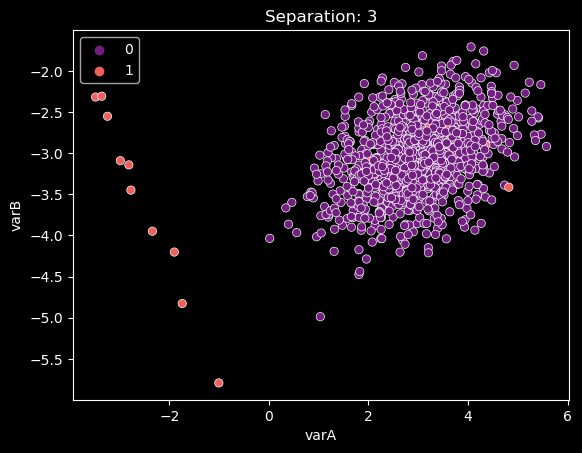

In [3]:
# create datasets with different class separatedness and plot

for sep in range(1,4):
    X, y = make_data(sep)
    
    print(y.value_counts())
    
    sns.scatterplot(
        data= X, 
        x = "varA",
        y = "varB",
        palette= "magma",
        hue = y
    )
    plt.title("Separation: {}".format(sep))
    plt.show();

## Under-sample with Condensed Nearest Neighbours

### Well Separated Classes

In [4]:
# create data

X, y = make_data(sep = 2)

cnn = CondensedNearestNeighbour(
    sampling_strategy= "auto",
    random_state = 0, 
    n_neighbors= 1,
    n_jobs = 6
)

X_resampled, y_resampled = cnn.fit_resample(X, y)

<blockquote>In the original publication of the Condensed Nearest Neighbours method, it utilizes the parameter n_neighbors set to 1.</blockquote>

In [5]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# size of the under-sampled data

X_resampled.shape, y_resampled.shape

((55, 2), (55,))

<blockquote>The resampled dataset contains 70 observations. 

These observations are determined by the algorithm.

It has nothing to do with the number of observations in the minority class, which contains 17 observations.</blockquote>

In [7]:
# number of minority class observations

y.value_counts()

0    985
1     15
Name: count, dtype: int64

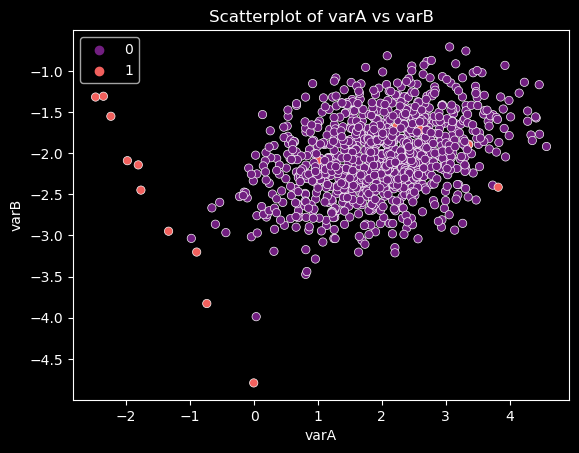

In [8]:
sns.scatterplot(
    data = X,
    x = "varA",
    y = "varB",
    palette= "magma",
    hue = y
)
plt.xlabel("varA")
plt.ylabel("varB")
plt.title("Scatterplot of varA vs varB");

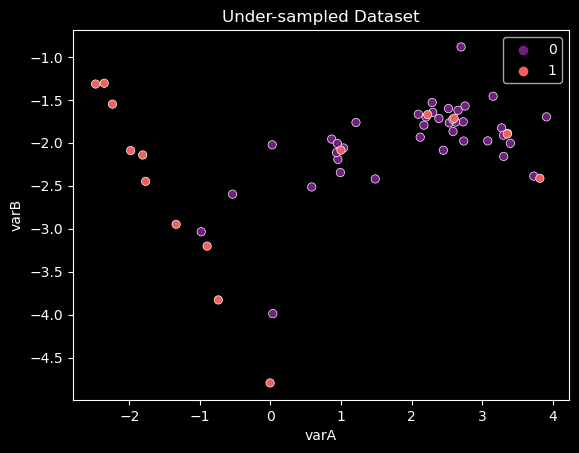

In [9]:
sns.scatterplot(
    data = X_resampled,
    x = "varA",
    y = "varB",
    palette= "magma",
    hue = y_resampled
)

plt.title("Under-sampled Dataset")
plt.show()

<blockquote>Condensed Nearest Neighbours retains the observations from the majority class, that are more similar to those in the minority class.</blockquote>

### Partially separated classes

In [10]:
# Create data
X, y = make_data(sep = 0.5)

# set up condensed nearest neighbour transformer

cnn = CondensedNearestNeighbour(
    sampling_strategy= "auto",
    random_state = 9, 
    n_neighbors= 1,
    n_jobs= 6
)

X_resampled, y_resampled = cnn.fit_resample(X, y) 

<blockquote>
📌 If we repeat this procedure in a dataset where the samples are not clearly separated.

<br>To obtain this, set the parameter `sep` to 0.5 to create our toy data set.
</blockquote>

In [11]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [12]:
# undersampled data

X_resampled.shape, y_resampled.shape

((78, 2), (78,))

<blockquote><b>📌Note:</b> <br>More samples were included in the final training set, compared to the previous case where classes were more separated.

This is because the classes are less separated.

There are now more observations from the majority class that are likely to be misclassified as one from the minority class.</blockquote>

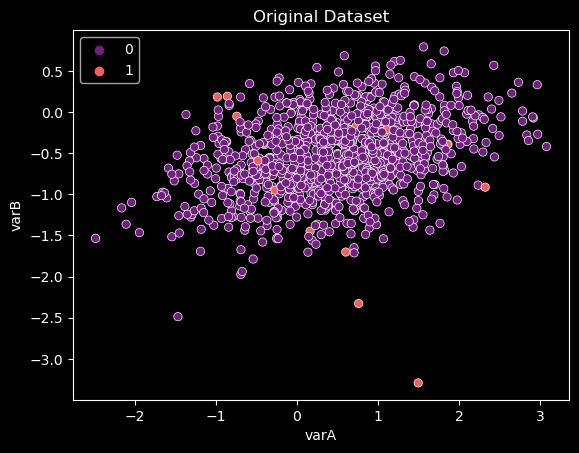

In [13]:
sns.scatterplot(
    data = X,
    x = "varA",
    y= "varB",
    palette = "magma",
    hue = y
)
plt.title("Original Dataset");

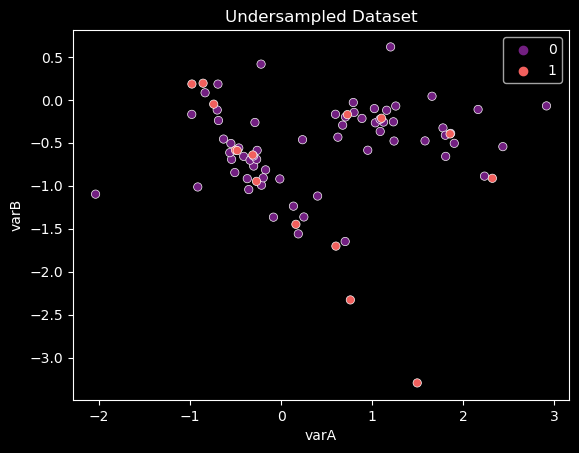

In [14]:
sns.scatterplot(
    data = X_resampled,
    x = "varA",
    y = "varB",
    palette= "magma",
    hue = y_resampled
)
plt.title("Undersampled Dataset");

<blockquote>We can see more clearly that there is a clear overlap between the majority and the minority class.</blockquote>

Comparing the different distribution and dataset sizes 

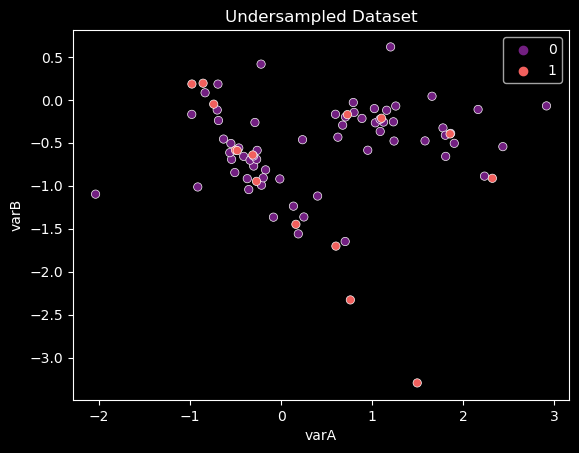

The number of neighbors: 1
(78, 2) (78,)


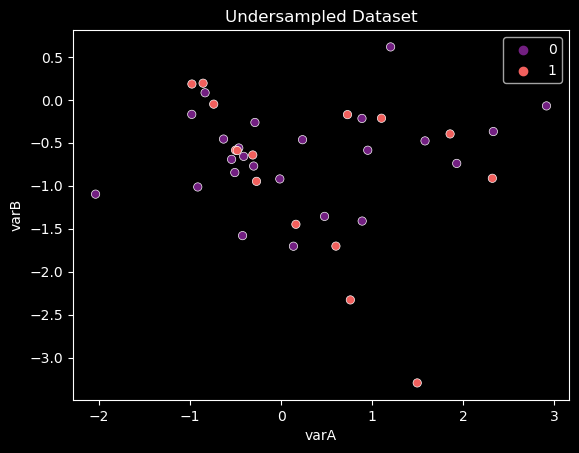

The number of neighbors: 2
(39, 2) (39,)


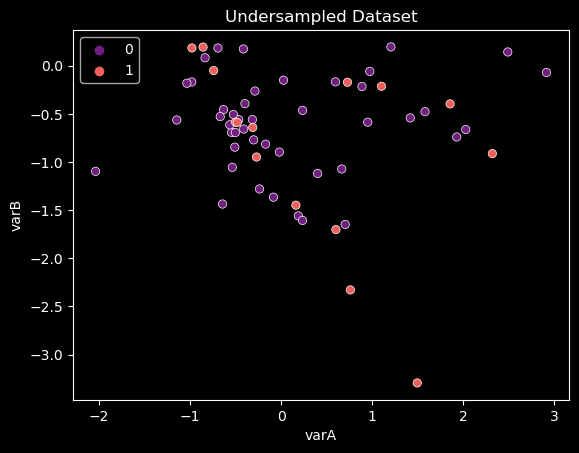

The number of neighbors: 3
(59, 2) (59,)


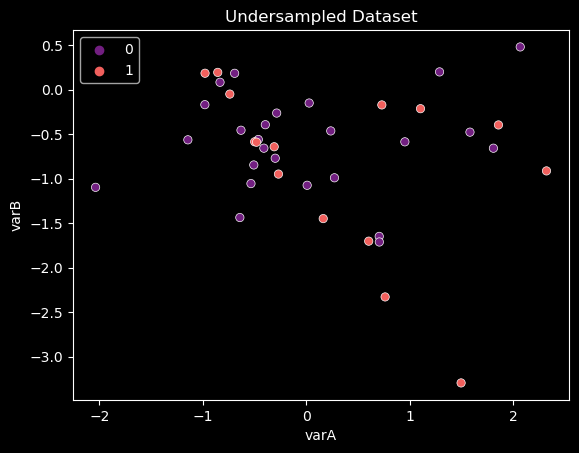

The number of neighbors: 4
(40, 2) (40,)


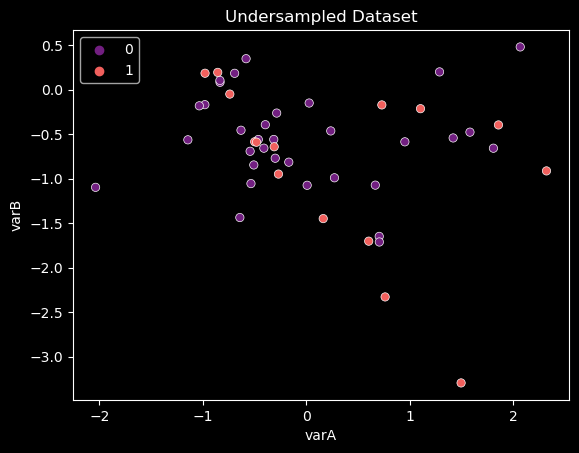

The number of neighbors: 5
(48, 2) (48,)


In [15]:
for neighbors in range(1, 6):
    cnn = CondensedNearestNeighbour(
    sampling_strategy= "auto",
    random_state = 9, 
    n_neighbors= neighbors,
    n_jobs= 6
    )

    X_resampled, y_resampled = cnn.fit_resample(X, y) 

    sns.scatterplot(
        data = X_resampled,
        x = "varA",
        y = "varB",
        palette= "magma",
        hue = y_resampled
    )
    plt.title("Undersampled Dataset")
    plt.show()
    print(f"The number of neighbors: {neighbors}")
    print(X_resampled.shape, y_resampled.shape);

# Condensed Nearest Neighbours

## Real data - Performance comparison

In [16]:
# load data
# only a few observations to speed the computation

data = pd.read_csv('../kdd2004.csv').sample(10000)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
44444,55.81,26.40,-0.63,-22.0,15.5,1705.1,0.62,-1.23,-10.0,-70.0,...,2528.3,-0.01,-0.38,-12.0,-78.0,162.0,2.21,0.42,0.90,-1
138845,78.40,27.55,0.28,17.5,-13.0,1343.4,-1.44,0.40,4.5,-62.0,...,574.8,0.74,1.82,-4.0,-38.0,329.1,-0.55,0.33,0.47,-1
2892,48.91,33.04,0.06,6.5,86.0,2732.3,0.62,-0.70,-3.5,-71.0,...,3158.6,-1.27,-0.66,-1.0,-86.0,706.5,1.02,0.26,0.22,-1
98984,73.95,23.11,0.82,4.5,-21.5,2735.1,0.90,0.13,-12.5,-98.0,...,2955.7,-0.02,-1.26,4.0,-97.0,564.4,1.31,0.47,0.58,-1
42923,56.16,24.10,0.32,18.5,2.5,906.5,1.45,0.30,10.0,-62.0,...,1201.7,-0.13,-1.76,-29.0,-54.0,815.2,-0.75,0.16,0.55,-1


In [17]:
# imbalanced target

data["target"].value_counts(normalize= True)

target
-1    0.9907
 1    0.0093
Name: proportion, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels = ["target"], axis =1),
    data["target"],
    test_size= 0.3,
    random_state = 0
)

X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [19]:
cnn = CondensedNearestNeighbour(
    sampling_strategy = "auto",
    random_state = 0,
    n_neighbors = 1,
    n_jobs = 6
)

X_resampled , y_resampled = cnn.fit_resample(X_train, y_train)

In [20]:
X_resampled.shape, y_resampled.shape

((372, 74), (372,))

In [21]:
y_train.value_counts()

target
-1    6931
 1      69
Name: count, dtype: int64

### Plot Data

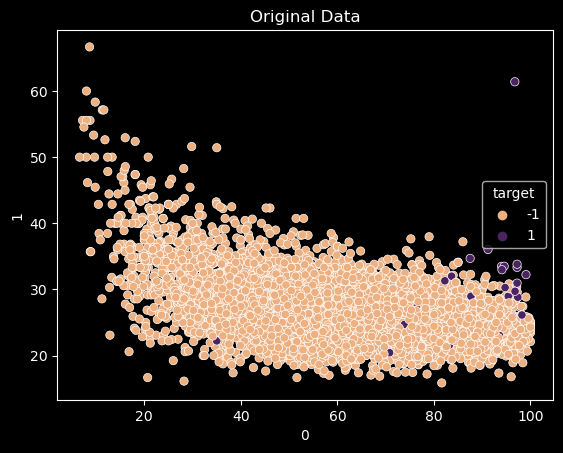

In [30]:
# Original data

sns.scatterplot(
    data = X_train,
    x = "0",
    y = "1",
    palette= "flare",
    hue = y_train
)

plt.title("Original Data");

Text(0.5, 1.0, 'Undersampled data')

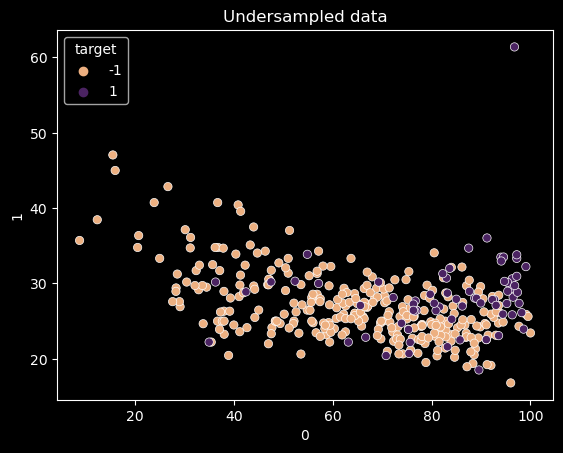

In [31]:
# undersampled data

sns.scatterplot(
    data = X_resampled,
    x = "0",
    y = "1",
    palette = "flare",
    hue = y_resampled
)

plt.title("Undersampled data")

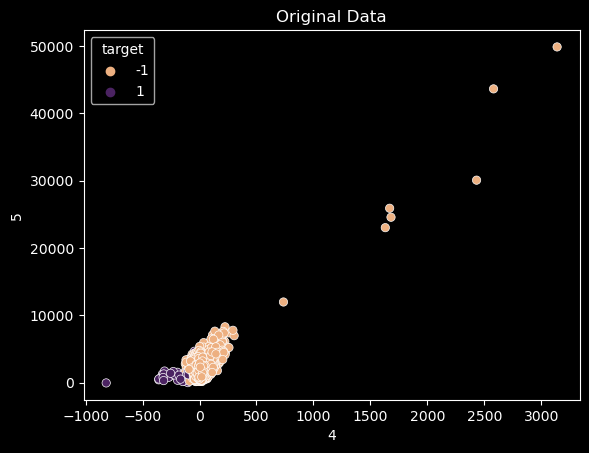

In [32]:
# Original data

sns.scatterplot(
    data = X_train,
    x = "4",
    y = "5",
    palette= "flare",
    hue = y_train
)

plt.title("Original Data");

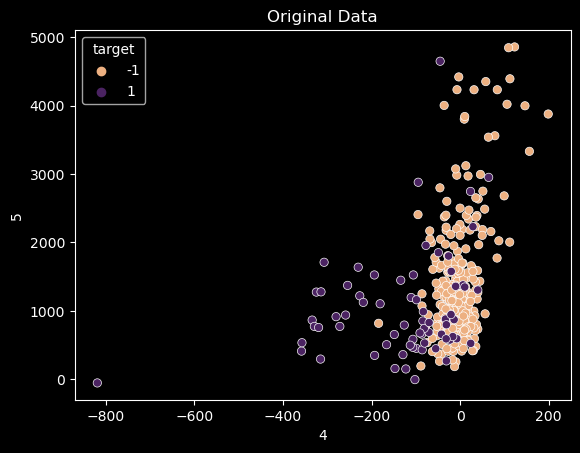

In [33]:
# Original data

sns.scatterplot(
    data = X_resampled,
    x = "4",
    y = "5",
    palette= "flare",
    hue = y_resampled
)

plt.title("Original Data");

### Machine learning performance comparison

In [34]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(
        n_estimators= 200, 
        random_state= 29,
        max_depth= 4
    )
    
    rf.fit(X_train, y_train)
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [36]:
# evaluate performance of algorithm built
# using imbalanced dataset

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9908298988581024
Test set
Random Forests roc-auc: 0.9870211693548387


In [35]:
# evaluate performance of algorithm built
# using undersampled dataset

run_randomForests(X_resampled,
                  X_test,
                  y_resampled,
                  y_test)

Train set
Random Forests roc-auc: 0.9971301477973884
Test set
Random Forests roc-auc: 0.9790406586021506
